<a href="https://colab.research.google.com/github/priyam3198/projects/blob/main/Driver_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
!pip install imblearn
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **EXPLORATORY DATA ANALYSIS**


In [ ]:
df = pd.read_csv("driver.csv")

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df.shape

(19104, 14)

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

## **MISSING VALUES**

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = missing_values / len(df)
missing_df = pd.DataFrame({'missing_values': missing_values, 'missing_percentages': missing_percentage})
missing_df.head()

,missing_values,missing_percentages
MMM-YY,0,0.000000
Driver_ID,0,0.000000
Age,61,0.003193
Gender,52,0.002722
City,0,0.000000


In [ ]:
numeric_cols = df.select_dtypes(include=['float', 'int'])

In [ ]:
numeric_cols

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,0.0,2,57387,1,1,2381060,2
1,1,28.0,0.0,2,57387,1,1,-665480,2
2,1,28.0,0.0,2,57387,1,1,0,2
3,2,31.0,0.0,2,67016,2,2,0,1
4,2,31.0,0.0,2,67016,2,2,0,1
...,...,...,...,...,...,...,...,...,...
19099,2788,30.0,0.0,2,70254,2,2,740280,3
19100,2788,30.0,0.0,2,70254,2,2,448370,3
19101,2788,30.0,0.0,2,70254,2,2,0,2
19102,2788,30.0,0.0,2,70254,2,2,200420,2


In [ ]:
col = numeric_cols.columns

## **FIXING MISSING VALUES WITH KNN IMPUTER**

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputed_numeric_cols = imputer.fit_transform(numeric_cols)
imputed_df = pd.DataFrame(imputed_numeric_cols, columns=col)

In [ ]:
df1 = df
df1.drop(columns=col,axis=1,inplace=True)
df1 = pd.concat([df1, imputed_df], axis=1)

In [ ]:
df1.head()

,MMM-YY,City,Dateofjoining,LastWorkingDate,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,C23,2018-12-24,NaT,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,2019-02-01,C23,2018-12-24,NaT,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,2019-03-01,C23,2018-12-24,2019-03-11,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,2020-11-01,C7,2020-11-06,NaT,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,2020-12-01,C7,2020-11-06,NaT,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0


In [ ]:
missing_values = df1.isnull().sum()
missing_percentage = missing_values / len(df1)
missing_df = pd.DataFrame({'missing_values': missing_values, 'missing_percentages': missing_percentage})
missing_df.head()

,missing_values,missing_percentages
MMM-YY,0,0.00000
City,0,0.00000
Dateofjoining,0,0.00000
LastWorkingDate,17488,0.91541
Driver_ID,0,0.00000


## **FEATURE ENGINEERING**

In [ ]:
d = {'Age':'max', 'Gender':'first','City':'first', 'Education_Level':'last',
             'Income':'last', 'Joining Designation':'last','Grade':'last', 'Dateofjoining':'last',
             'LastWorkingDate':'last', 'Total Business Value':'sum','Quarterly Rating':'last'}

df2=df1.groupby(['Driver_ID','MMM-YY']).aggregate(d)

In [ ]:
df2.head(15)

Age  Gender City  Education_Level   Income  \
Driver_ID MMM-YY                                                    
1.0       2019-01-01  28.0     0.0  C23              2.0  57387.0   
          2019-02-01  28.0     0.0  C23              2.0  57387.0   
          2019-03-01  28.0     0.0  C23              2.0  57387.0   
2.0       2020-11-01  31.0     0.0   C7              2.0  67016.0   
          2020-12-01  31.0     0.0   C7              2.0  67016.0   
4.0       2019-12-01  43.0     0.0  C13              2.0  65603.0   
          2020-01-01  43.0     0.0  C13              2.0  65603.0   
          2020-02-01  43.0     0.0  C13              2.0  65603.0   
          2020-03-01  43.0     0.0  C13              2.0  65603.0   
          2020-04-01  43.0     0.0  C13              2.0  65603.0   
5.0       2019-01-01  29.0     0.0   C9              0.0  46368.0   
          2019-02-01  29.0     0.0   C9              0.0  46368.0   
          2019-03-01  29.0     0.0   C9              0.0  46368.0   
6.0       2020-08-01  31.0     1.0  C11              1.0  78728.0   
          2020-09-01  31.0     1.0  C11              1.0  78728.0   

                      Joining Designation  Grade Dateofjoining  \
Driver_ID MMM-YY                                                 
1.0       2019-01-01                  1.0    1.0    2018-12-24   
          2019-02-01                  1.0    1.0    2018-12-24   
          2019-03-01                  1.0    1.0    2018-12-24   
2.0       2020-11-01                  2.0    2.0    2020-11-06   
          2020-12-01                  2.0    2.0    2020-11-06   
4.0       2019-12-01                  2.0    2.0    2019-12-07   
          2020-01-01                  2.0    2.0    2019-12-07   
          2020-02-01                  2.0    2.0    2019-12-07   
          2020-03-01                  2.0    2.0    2019-12-07   
          2020-04-01                  2.0    2.0    2019-12-07   
5.0       2019-01-01                  1.0    1.0    2019-01-09   
          2019-02-01                  1.0    1.0    2019-01-09   
          2019-03-01                  1.0    1.0    2019-01-09   
6.0       2020-08-01                  3.0    3.0    2020-07-31   
          2020-09-01                  3.0    3.0    2020-07-31   

                     LastWorkingDate  Total Business Value  Quarterly Rating  
Driver_ID MMM-YY                                                              
1.0       2019-01-01             NaT             2381060.0               2.0  
          2019-02-01             NaT             -665480.0               2.0  
          2019-03-01      2019-03-11                   0.0               2.0  
2.0       2020-11-01             NaT                   0.0               1.0  
          2020-12-01             NaT                   0.0               1.0  
4.0       2019-12-01             NaT                   0.0               1.0  
          2020-01-01             NaT                   0.0               1.0  
          2020-02-01             NaT                   0.0               1.0  
          2020-03-01             NaT              350000.0               1.0  
          2020-04-01      2020-04-27                   0.0               1.0  
5.0       2019-01-01             NaT                   0.0               1.0  
          2019-02-01             NaT              120360.0               1.0  
          2019-03-01      2019-03-07                   0.0               1.0  
6.0       2020-08-01             NaT                   0.0               1.0  
          2020-09-01             NaT                   0.0               1.0

In [ ]:
df2.drop(columns=['Total Business Value'],axis=1,inplace=True)
df2.head()

Age  Gender City  Education_Level   Income  \
Driver_ID MMM-YY                                                    
1.0       2019-01-01  28.0     0.0  C23              2.0  57387.0   
          2019-02-01  28.0     0.0  C23              2.0  57387.0   
          2019-03-01  28.0     0.0  C23              2.0  57387.0   
2.0       2020-11-01  31.0     0.0   C7              2.0  67016.0   
          2020-12-01  31.0     0.0   C7              2.0  67016.0   

                      Joining Designation  Grade Dateofjoining  \
Driver_ID MMM-YY                                                 
1.0       2019-01-01                  1.0    1.0    2018-12-24   
          2019-02-01                  1.0    1.0    2018-12-24   
          2019-03-01                  1.0    1.0    2018-12-24   
2.0       2020-11-01                  2.0    2.0    2020-11-06   
          2020-12-01                  2.0    2.0    2020-11-06   

                     LastWorkingDate  Quarterly Rating  
Driver_ID MMM-YY                                        
1.0       2019-01-01             NaT               2.0  
          2019-02-01             NaT               2.0  
          2019-03-01      2019-03-11               2.0  
2.0       2020-11-01             NaT               1.0  
          2020-12-01             NaT               1.0

In [ ]:
df3=df2.groupby(['Driver_ID']).tail(1)

In [ ]:
df3.shape

(2381, 10)

In [ ]:
df4=df1.groupby(['Driver_ID',]).aggregate(d)

In [ ]:
df4.head()

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating
Driver_ID,,,,,,,,,,,
1.0,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,2019-03-11,1715580.0,2.0
2.0,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,0.0,1.0
4.0,43.0,0.0,C13,2.0,65603.0,2.0,2.0,2019-12-07,2020-04-27,350000.0,1.0
5.0,29.0,0.0,C9,0.0,46368.0,1.0,1.0,2019-01-09,2019-03-07,120360.0,1.0
6.0,31.0,1.0,C11,1.0,78728.0,3.0,3.0,2020-07-31,NaT,1265000.0,2.0


In [ ]:
df3['Total Business Value'] = df4['Total Business Value'].values

<ipython-input-271-f29e5b83a816>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Total Business Value'] = df4['Total Business Value'].values


In [ ]:
df3.head()

,,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Quarterly Rating,Total Business Value
Driver_ID,MMM-YY,,,,,,,,,,,
1.0,2019-03-01,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,2019-03-11,2.0,1715580.0
2.0,2020-12-01,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,1.0,0.0
4.0,2020-04-01,43.0,0.0,C13,2.0,65603.0,2.0,2.0,2019-12-07,2020-04-27,1.0,350000.0
5.0,2019-03-01,29.0,0.0,C9,0.0,46368.0,1.0,1.0,2019-01-09,2019-03-07,1.0,120360.0
6.0,2020-12-01,31.0,1.0,C11,1.0,78728.0,3.0,3.0,2020-07-31,NaT,2.0,1265000.0


In [ ]:
df5 = df2.groupby('Driver_ID')['Quarterly Rating'].agg(['first', 'last'])

In [ ]:
df5.head()

,first,last
Driver_ID,,
1.0,2.0,2.0
2.0,1.0,1.0
4.0,1.0,1.0
5.0,1.0,1.0
6.0,1.0,2.0


In [ ]:
df5['Quarterly_Increase'] = 0
df5.loc[df5['last'] > df5['first'], 'Quarterly_Increase'] = 1

In [ ]:
df5.head()

,first,last,Quarterly_Increase
Driver_ID,,,
1.0,2.0,2.0,0
2.0,1.0,1.0,0
4.0,1.0,1.0,0
5.0,1.0,1.0,0
6.0,1.0,2.0,1


## Adding Quarterly Rating Increase in our dataframe

In [ ]:
df3['Quarterly_Increase'] = df5['Quarterly_Increase'].values

<ipython-input-277-aa9696250f58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Quarterly_Increase'] = df5['Quarterly_Increase'].values


In [ ]:
df3.head()

,,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Quarterly Rating,Total Business Value,Quarterly_Increase
Driver_ID,MMM-YY,,,,,,,,,,,,
1.0,2019-03-01,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,2019-03-11,2.0,1715580.0,0
2.0,2020-12-01,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,1.0,0.0,0
4.0,2020-04-01,43.0,0.0,C13,2.0,65603.0,2.0,2.0,2019-12-07,2020-04-27,1.0,350000.0,0
5.0,2019-03-01,29.0,0.0,C9,0.0,46368.0,1.0,1.0,2019-01-09,2019-03-07,1.0,120360.0,0
6.0,2020-12-01,31.0,1.0,C11,1.0,78728.0,3.0,3.0,2020-07-31,NaT,2.0,1265000.0,1


In [ ]:
df6 = df2.groupby('Driver_ID')['Income'].agg(['first', 'last'])

In [ ]:
df6.head()

,first,last
Driver_ID,,
1.0,57387.0,57387.0
2.0,67016.0,67016.0
4.0,65603.0,65603.0
5.0,46368.0,46368.0
6.0,78728.0,78728.0


In [ ]:
df6['Income_Increase'] = 0
df6.loc[df6['last'] > df6['first'], 'Income_Increase'] = 1

In [ ]:
df6['Income_Increase'].value_counts()

0    2338
1      43
Name: Income_Increase, dtype: int64

In [ ]:
df6.head()

,first,last,Income_Increase
Driver_ID,,,
1.0,57387.0,57387.0,0
2.0,67016.0,67016.0,0
4.0,65603.0,65603.0,0
5.0,46368.0,46368.0,0
6.0,78728.0,78728.0,0


## Adding Income Increase in our dataframe

In [ ]:
df3['Income_Increase'] = df6['Income_Increase'].values

<ipython-input-284-8914b0149a4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Income_Increase'] = df6['Income_Increase'].values


In [ ]:
df3.head()

,,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Quarterly Rating,Total Business Value,Quarterly_Increase,Income_Increase
Driver_ID,MMM-YY,,,,,,,,,,,,,
1.0,2019-03-01,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,2019-03-11,2.0,1715580.0,0,0
2.0,2020-12-01,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,1.0,0.0,0,0
4.0,2020-04-01,43.0,0.0,C13,2.0,65603.0,2.0,2.0,2019-12-07,2020-04-27,1.0,350000.0,0,0
5.0,2019-03-01,29.0,0.0,C9,0.0,46368.0,1.0,1.0,2019-01-09,2019-03-07,1.0,120360.0,0,0
6.0,2020-12-01,31.0,1.0,C11,1.0,78728.0,3.0,3.0,2020-07-31,NaT,2.0,1265000.0,1,0


## Adding Churn(Target Variable) in our dataframe

In [ ]:
df3['Churn'] = 1
df3.loc[df3['LastWorkingDate'].isnull(), 'Churn'] = 0

<ipython-input-286-e9a5fa25cfd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Churn'] = 1
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df3['Churn'].head()

Driver_ID  MMM-YY    
1.0        2019-03-01    1
2.0        2020-12-01    0
4.0        2020-04-01    1
5.0        2019-03-01    1
6.0        2020-12-01    0
Name: Churn, dtype: int64

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2381 entries, (1.0, Timestamp('2019-03-01 00:00:00')) to (2788.0, Timestamp('2020-12-01 00:00:00'))
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Age                   2381 non-null   float64       
 1   Gender                2381 non-null   float64       
 2   City                  2381 non-null   object        
 3   Education_Level       2381 non-null   float64       
 4   Income                2381 non-null   float64       
 5   Joining Designation   2381 non-null   float64       
 6   Grade                 2381 non-null   float64       
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Quarterly Rating      2381 non-null   float64       
 10  Total Business Value  2381 non-null   float64       
 11  Quarterly_Increase    2381 non-null   int64         
 12  

In [ ]:
df3.describe()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Quarterly Rating,Total Business Value,Quarterly_Increase,Income_Increase,Churn
count,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000
mean,33.676018,0.410584,1.00756,59334.157077,1.820244,2.096598,1.427971,4.586742e+06,0.150357,0.018060,0.678706
std,5.974057,0.491359,0.81629,28383.666384,0.841433,0.941522,0.809839,9.127115e+06,0.357496,0.133195,0.467071
min,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,1.000000,-1.385530e+06,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,1.000000,8.176800e+05,0.000000,0.000000,1.000000
75%,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,2.000000,4.173650e+06,0.000000,0.000000,1.000000
max,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,4.000000,9.533106e+07,1.000000,1.000000,1.000000


## **Inference**

In [ ]:
def analysis(df, colnames, n,m):
    fig , ax = plt.subplots(n,m,figsize=(16,30))
    string = "Frequency of "
    rows = 0
    for colname in colnames:
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        count.plot.bar(ax=ax[rows][0])
        ax[rows][0].set_ylabel(string)
        ax[rows][0].set_xlabel(colname)
        count.plot.pie(ax=ax[rows][1])
        string = "Frequency of "
        rows += 1

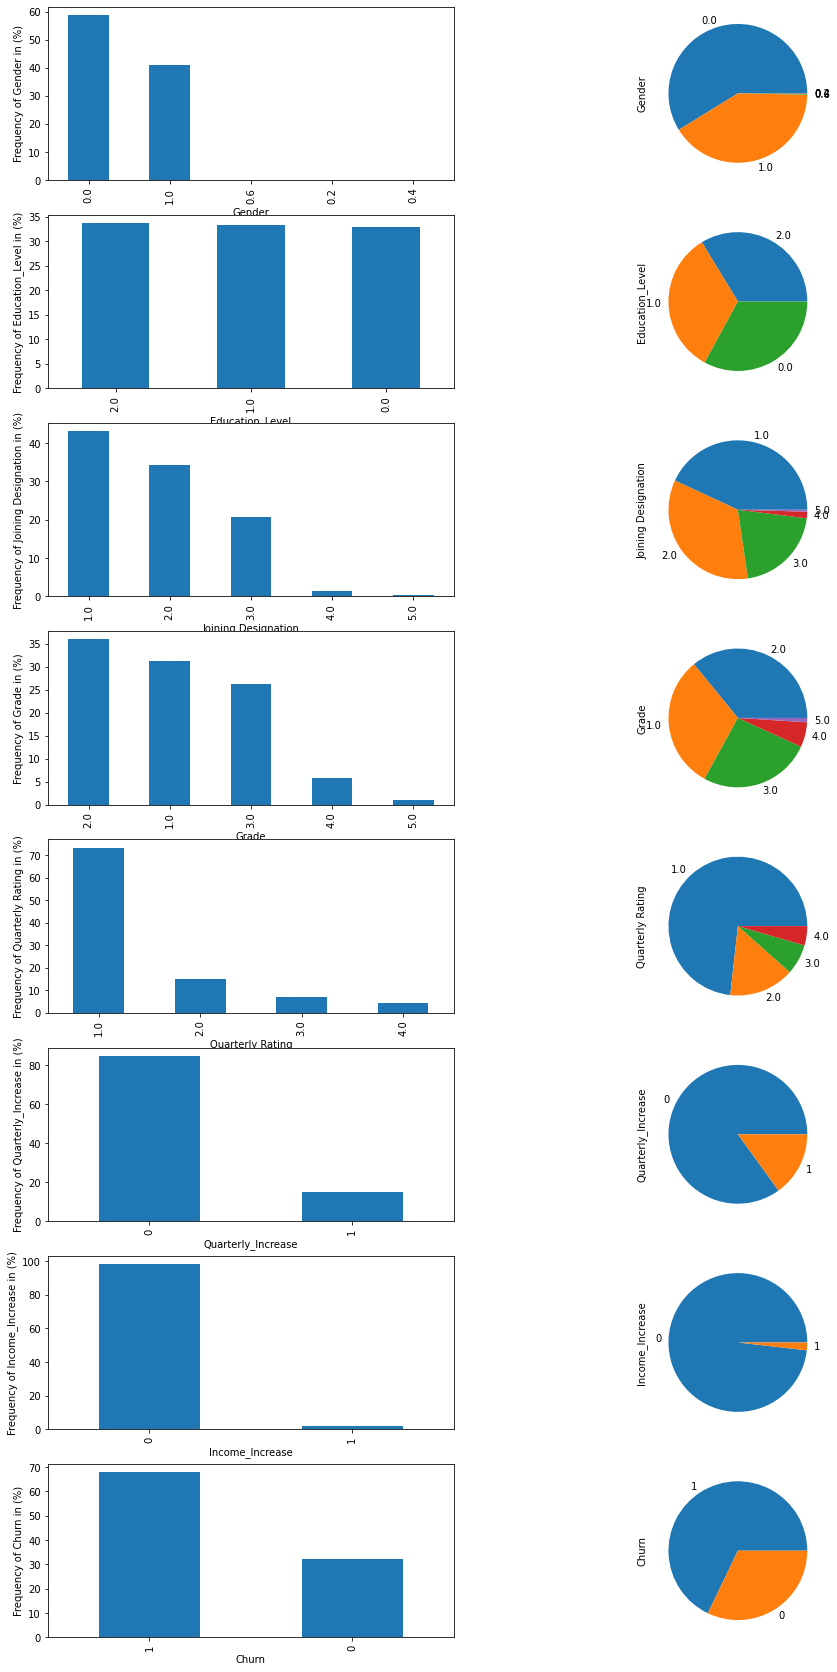

In [ ]:
cat_cols = ['Gender', 'Education_Level','Joining Designation', 'Grade','Quarterly Rating','Quarterly_Increase','Income_Increase','Churn']
analysis(df3,cat_cols,8,2)

### Inferences:

- There are more male drivers than female.
- Drivers in each education level category are almost same by number.
- There are almost 40% of drivers with joining designation 1, almost 30% with joining designation 2, there are very less drivers with joining designation 5(almost 0%)
- There almost 35% drivers with grade 2, almost 30% with grade1, very less with grade5(almost 0%)
- There are almost 80% drivers with Quarterly Rating Increase.
- There are almost 95% drivers with Income Increase.
- Churn percentage is almost 65% which is very high.






## **OUTLIERS**

In [ ]:
def outliers(df,colname,n,m):
    fig , ax = plt.subplots(n,m,figsize=(12,20))
    rows = 0
    for var in colname:
        ax[rows][0].set_title("Boxplot for Outlier Detection ")
        plt.ylabel(var)
        sns.boxplot(y = df[var],color='b',ax=ax[rows][0])

        sns.distplot(df[var],color='y',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='m', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

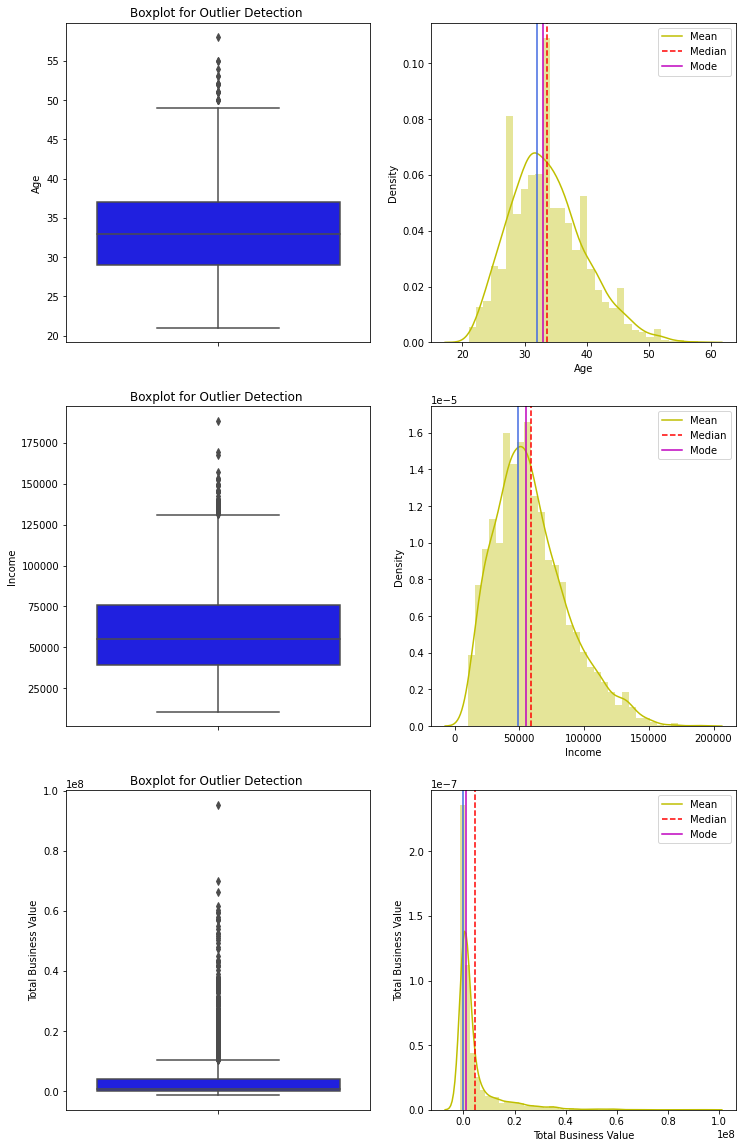

In [ ]:
col_num = [ 'Age', 'Income', 'Total Business Value']
outliers(df3,col_num,3,2)

## **BI-VARIATE ANALYSIS**

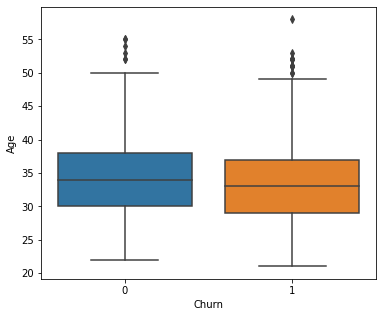

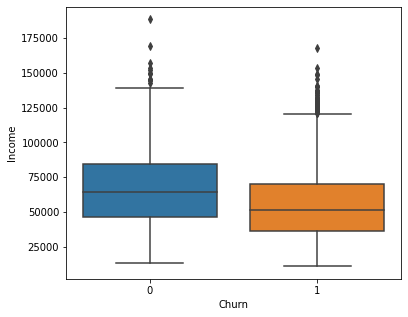

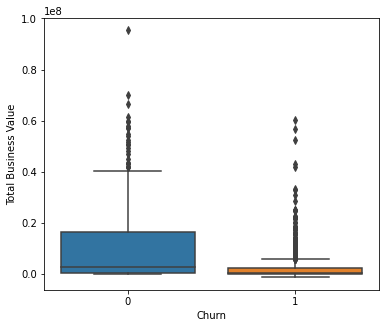

In [ ]:
for col in ['Age', 'Income', 'Total Business Value']:
  fig,axes = plt.subplots(1,1,figsize=(6,5))
  sns.boxplot(x=df3['Churn'], y=df3[col])


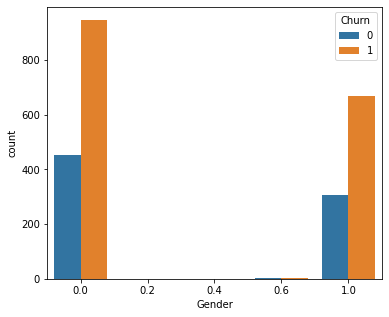

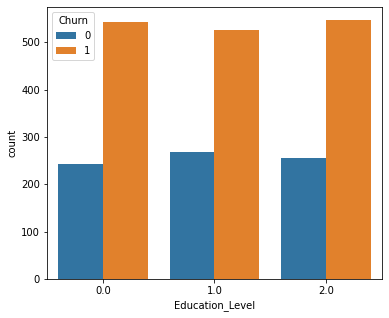

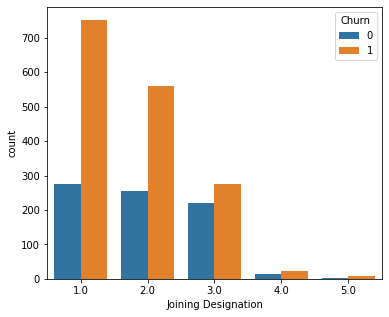

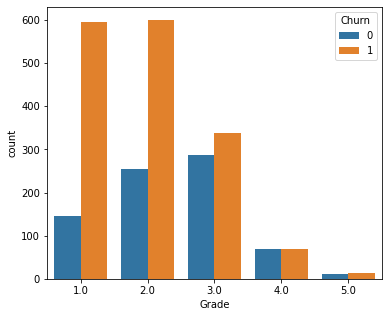

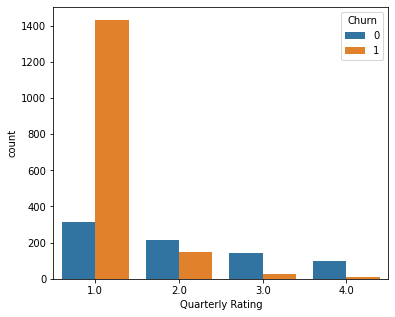

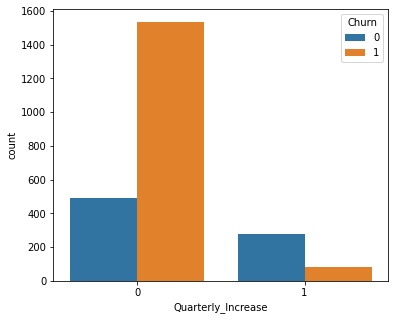

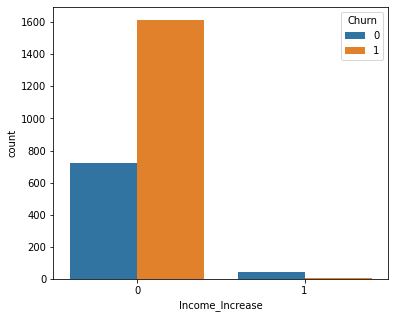

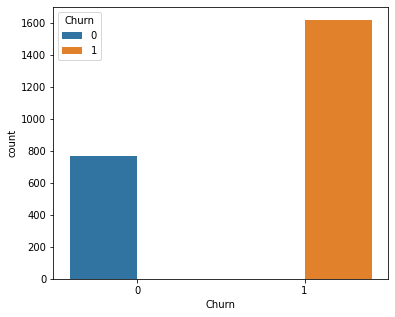

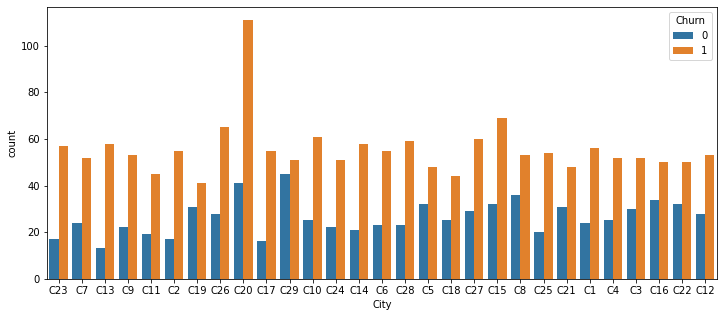

In [ ]:
for col in cat_cols:
        fig,axes = plt.subplots(1,1,figsize=(6,5))
        sns.countplot(x=df3[col], hue=df3['Churn'])
fig,axes = plt.subplots(1,1,figsize=(12,5))
sns.countplot(x=df3['City'], hue=df3['Churn'])

## INFERENCES FROM ABOVE
- Churn looks high for both the genders.
- Churn looks similar for all the education levels
- Churn percentage looks higher for lower joining designation levels.
- Churn looks very high for drivers with lower grades.
- Churn looks high for drivers with no quarterly increase
- Churn looks high for drivers with no income increase.
- Churn looks very high city c20, c26 and c15.

## **ONE-HOT ENCODING**

In [ ]:
df3 = pd.get_dummies(df3, columns=['City'], drop_first=True)

In [ ]:
df3.shape
df3.drop(columns=['Income','Quarterly Rating'], inplace=True)

In [ ]:
df3.drop(columns=['Dateofjoining','LastWorkingDate'], axis=1,inplace=True)

In [ ]:
df3.reset_index(drop=True,inplace=True)

In [ ]:
df3.head()

,Age,Gender,Education_Level,Joining Designation,Grade,Total Business Value,Quarterly_Increase,Income_Increase,Churn,City_C10,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,28.0,0.0,2.0,1.0,1.0,1715580.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.0,2.0,2.0,2.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,43.0,0.0,2.0,2.0,2.0,350000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,29.0,0.0,0.0,1.0,1.0,120360.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,31.0,1.0,1.0,3.0,3.0,1265000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3['Churn'].value_counts()

1    1616
0     765
Name: Churn, dtype: int64

## **APPLYING ENSEMBLE LEARNING**

## **BAGGING**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

In [ ]:
X = df3.drop('Churn', axis=1)
y = df3['Churn']

## Treating class imbalance with SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [ ]:
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20]
}

## Applying Random Forest with appropriate parameters and Hyperparameter Tuning

In [ ]:
model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [ ]:
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 20}


In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=20)

In [ ]:
score = best_model.score(X_test, y_test)
print('Accuracy:', score)

Accuracy: 0.8114374034003091


## Classification Report

In [ ]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       326
           1       0.79      0.85      0.82       321

    accuracy                           0.81       647
   macro avg       0.81      0.81      0.81       647
weighted avg       0.81      0.81      0.81       647



## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[251  75]
 [ 47 274]]


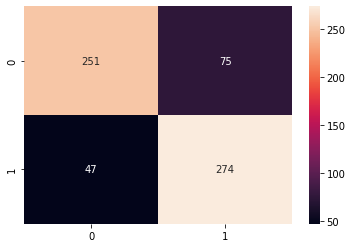

In [ ]:
sns.heatmap(matrix, annot=True, fmt='d')

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]

## AUC-ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

auc = roc_auc_score(y_test, y_proba)
print('AUC-ROC score:', auc)

AUC-ROC score: 0.8850648854232364


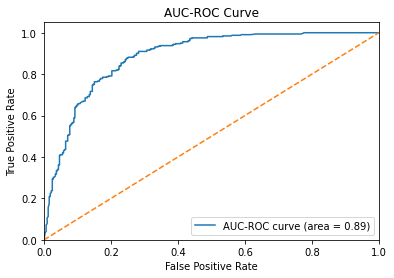

In [ ]:
plt.plot(fpr, tpr, label='AUC-ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Feature Importance

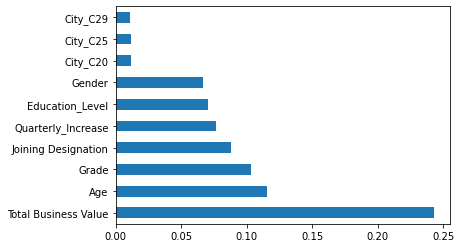

In [ ]:
feat_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

## **BOOSTING**

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
param_grid_xg = {
    'learning_rate': [0.1, 0.5, 1.0,1.5,2.0],
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [10, 20, 30,40,50]
}

## **Using XGBoost with appropriate parameters & Hyperparameter tuning**

In [ ]:
model_xg = XGBClassifier()
grid_search_xg = GridSearchCV(model_xg, param_grid_xg)
grid_search_xg.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0],
                         'max_depth': [5, 10, 15, 20],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [ ]:
print('Best hyperparameters:', grid_search_xg.best_params_)

Best hyperparameters: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 30}


In [ ]:
best_model_xg = grid_search_xg.best_estimator_
best_model_xg.fit(X_train, y_train)

XGBClassifier(learning_rate=0.5, max_depth=10, n_estimators=30)

In [ ]:
score_xg = best_model_xg.score(X_test, y_test)
print('Accuracy:', score)

Accuracy: 0.8114374034003091


## Classification Report

In [ ]:
y_pred = best_model_xg.predict(X_test)
report_xg = classification_report(y_test, y_pred)
print(report_xg)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       326
           1       0.80      0.83      0.81       321

    accuracy                           0.81       647
   macro avg       0.81      0.81      0.81       647
weighted avg       0.81      0.81      0.81       647



In [ ]:
y_proba = best_model_xg.predict_proba(X_test)[:, 1]

## AUC-ROC CURVE

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

auc_xg = roc_auc_score(y_test, y_proba)
print('AUC-ROC score:', auc_xg)

AUC-ROC score: 0.8931588402805649


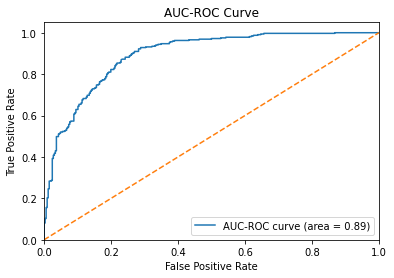

In [ ]:
plt.plot(fpr, tpr, label='AUC-ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc="lower right")
plt.show()

## CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
matrix_xg = confusion_matrix(y_test, y_pred)
print(matrix_xg)

[[257  69]
 [ 53 268]]


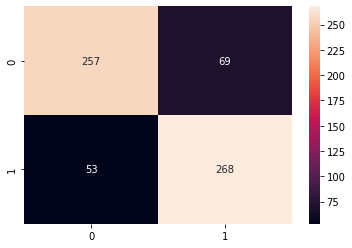

In [ ]:
sns.heatmap(matrix_xg, annot=True, fmt='d')

## FEATURE IMPORTANCE

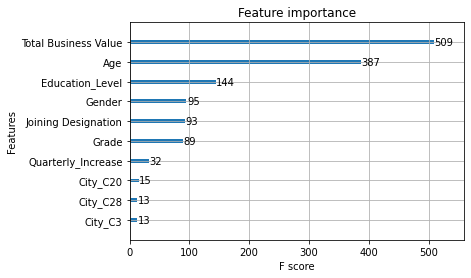

In [ ]:
plot_importance(best_model_xg, max_num_features=10)